#### A7 – FEATURE EXTRACTION FROM LABELED BLOBS

Andeo, Lovely\
2020-05405\
FX-2

**Activity 7**

Layout a single-colored cartolina or cloth on a table and spread out several objects with different shapes or sizes. In preparation for machine learning, choose objects that you would like to classify. For example, different coins, mixed nuts or grains, medicinal pills, electrical components, etc. Capture images of your spread out samples.

Segment your objects from the background. Clean the resulting image with morphological operations, as necessary.

Label and measure blob features using bwlabel and regionprops.


**Importing all packages**

In [1]:
from PIL import Image
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage
import cv2

from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.color import rgb2gray, rgb2hsv, label2rgb
from skimage.measure import label, regionprops, regionprops_table
from skimage.morphology import (erosion, dilation, closing, opening)
from skimage.io import imread, imshow
from skimage.filters import threshold_otsu
from scipy.ndimage import median_filter
from matplotlib.patches import Rectangle
from matplotlib.image import imread
from matplotlib.colors import ListedColormap
from tqdm import tqdm


**Defining function**

For easier application, I defined a function to automatically extract the features of the objects in the images. The arguments to be provided include the file name, the threshold bounds (which can be adjusted along each run), the element for the morpholocal operations, the operations, and the set of properties to be extracted from the image.

In [37]:
def features(img_name, lower_threshold, upper_threshold, element, operation1, operation2, properties):
    I = Image.open(img_name)
    I_gray = I.convert('L')

    # Calculating the histogram
    count, cells = I_gray.histogram(), list(range(256))
    plt.plot(cells, count)
    plt.title('Histogram of the image')
    plt.xlabel('grayscale')
    plt.ylabel('pixels')

    # Specifying the range values for the threshold
    threshold_range = (lower_threshold, upper_threshold)

    # Thresholding the image within the range
    BW = np.logical_and(np.array(I_gray) > threshold_range[0], np.array(I_gray) < threshold_range[1])
    seg = operation2(operation1(BW, element), element)
    labeled_image = label(seg)

    # Printing the original image
    plt.figure(figsize=(13, 8))
    plt.imshow(I)
    plt.title('Original Image with Numbered Objects')

    # Adding number tag on the objects of interest
    for region in regionprops(labeled_image):
        y, x = region.centroid
        plt.text(x, y, region.label, color='red', fontsize=12)
    
    # Printing the labeled image as a color bar
    plt.figure(figsize=(12, 7))
    plt.imshow(labeled_image, cmap='plasma')
    plt.colorbar()
    plt.title('Labeled Image')
    plt.show()

    # Displaying the properties or features as a table
    df = pd.DataFrame(regionprops_table(labeled_image, properties=properties))
    df = df.reset_index(drop=True)
    
    return df


Then, I decided to make another function sole for graphing the properties. This is the same as above, only that it does not display the uncessary plots for plotting the feature.

In [30]:
def graph(img_name, lower_threshold, upper_threshold, element, operation1, operation2, properties):
    I = Image.open(img_name)
    I_gray = I.convert('L')

    # Specifying the range values for the threshold
    threshold_range = (lower_threshold, upper_threshold)

    # Thresholding the image within the range
    BW = np.logical_and(np.array(I_gray) > threshold_range[0], np.array(I_gray) < threshold_range[1])

    seg = operation2(operation1(BW, element), element)
    labeled_image = label(seg)

    # Displaying the properties or features as a table
    df = pd.DataFrame(regionprops_table(labeled_image, properties=properties))
    df = df.reset_index(drop=True)
    
    return df


**Applying the functions**

For each sample image below, I used an appropriate element to segment the objects of interest and chose the function arguments necessary or applicable to the image.

**OVERLAPPING BLOBS** : First is using the malaria image provided with overlapping blobs.

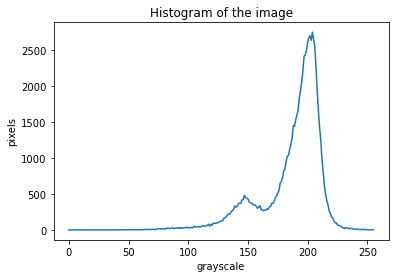

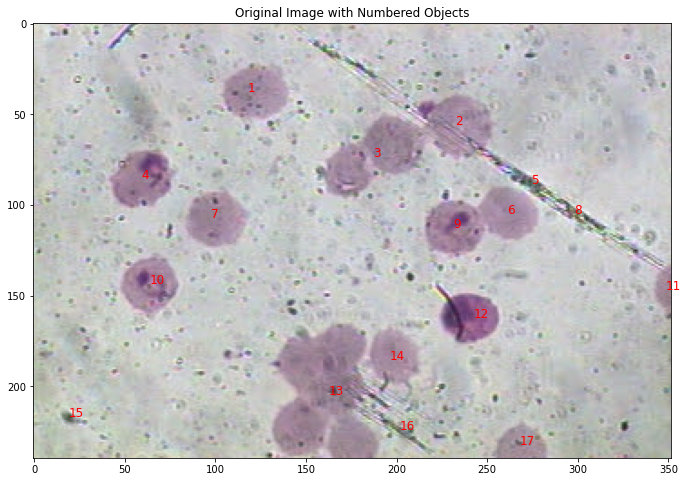

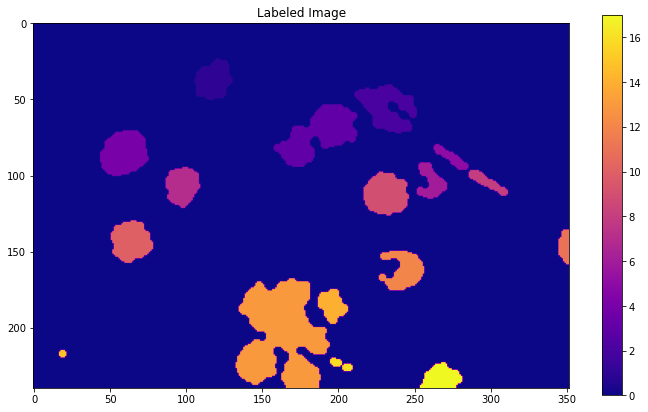

,area,convex_area,bbox_area,major_axis_length,minor_axis_length,eccentricity
0,490,533,675,28.102333,22.633277,0.592748
1,781,961,1312,41.883026,29.097612,0.719266
2,1168,1445,2255,62.116422,27.938644,0.893140
3,740,767,960,33.789982,28.067269,0.556812
4,152,176,391,29.183129,6.943041,0.971287
5,279,360,480,26.681029,18.006977,0.737911
6,458,483,621,26.618686,22.237049,0.549654
7,170,194,442,32.176504,7.090510,0.975418
8,661,698,870,30.268746,28.025181,0.377821
9,578,616,784,27.440047,27.226426,0.124537


In [38]:
element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])
properties = ['area','convex_area','bbox_area','major_axis_length', 'minor_axis_length','eccentricity']
features('malaria.jpeg',90, 150, element, closing, opening, properties)

Then I got the scatter plot of eccentricity features for better visualization.

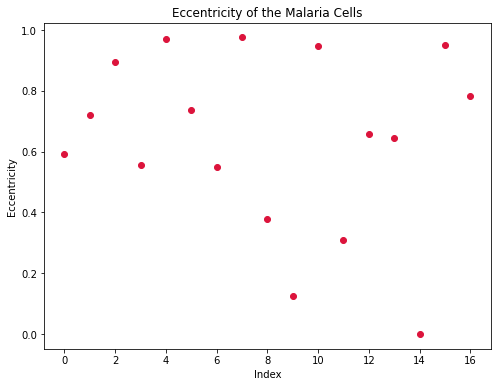

In [32]:
df = graph('malaria.jpeg',90, 150, element, closing, opening, properties)

plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['eccentricity'], color='crimson')
plt.title('Eccentricity of the Malaria Cells')
plt.xlabel('Index')
plt.ylabel('Eccentricity')
plt.show()


I also got the scatter plot of the area features.

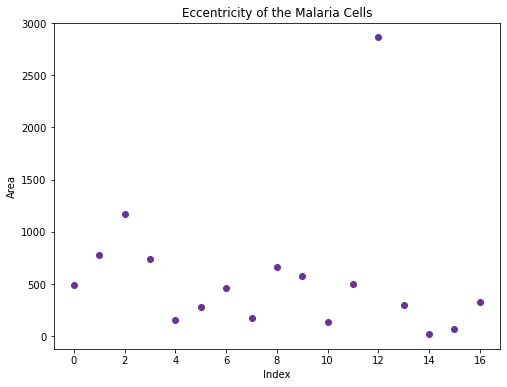

In [45]:
df = graph('malaria.jpeg',90, 150, element, closing, opening, properties)

plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['area'], color='rebeccapurple')
plt.title('Eccentricity of the Malaria Cells')
plt.xlabel('Index')
plt.ylabel('Area')
plt.show()


**SEPARATED BLOBS:** The next image is of the candy nips. Unlike the previous one, these have nearly perfect circle shapes and are separated from each other (no overlaps).

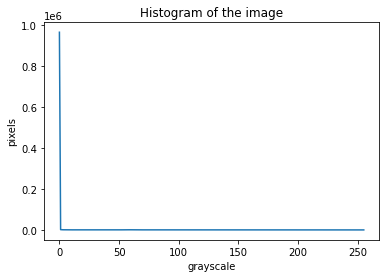

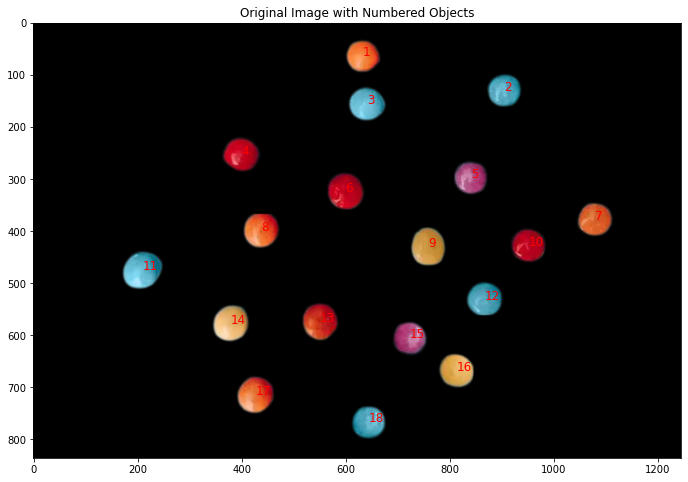

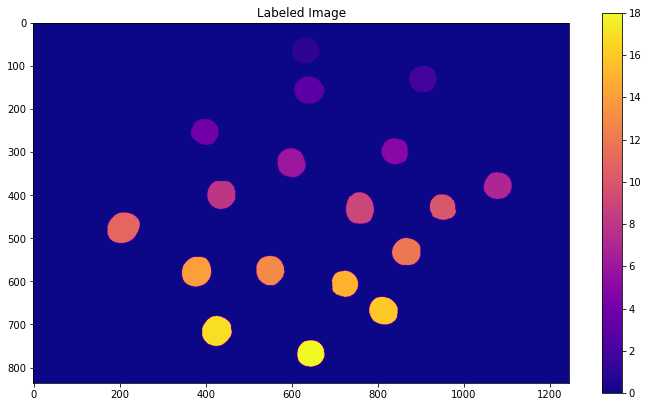

,bbox-0,bbox-1,bbox-2,bbox-3,area,eccentricity
0,34,602,94,666,2994,0.283975
1,100,874,160,937,3086,0.272741
2,124,607,187,677,3426,0.412869
3,223,367,283,431,2988,0.360770
4,268,809,328,871,2979,0.221802
5,291,568,358,634,3500,0.336253
6,346,1047,409,1112,3239,0.284058
7,367,405,432,470,3499,0.214518
8,393,727,466,792,3851,0.476631
9,398,922,457,983,2892,0.354445


In [39]:
element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])
properties = ['bbox','area','eccentricity']
features('8.png',40, 256, element, closing, opening, properties)

I also graphed its area and eccentricity. 

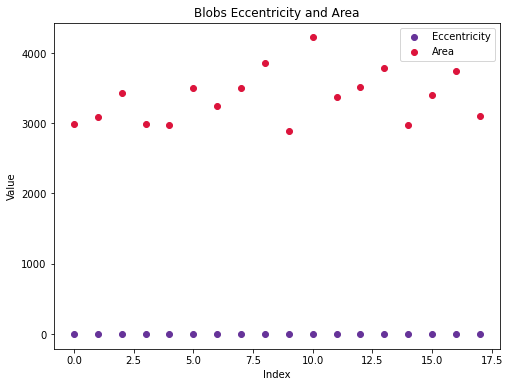

In [35]:
df = graph('8.png', 40, 256, element, closing, opening, properties)

plt.figure(figsize=(8, 6))

# Plot eccentricity in blue
plt.scatter(df.index, df['eccentricity'], color = 'rebeccapurple', label='Eccentricity')

# Plot area in red
plt.scatter(df.index, df['area'], color='crimson', label='Area')

plt.title('Blobs Eccentricity and Area')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


**GRANULATED BLOBS:** For this, I used my favorite fruit's (dragonfruit) seeds!

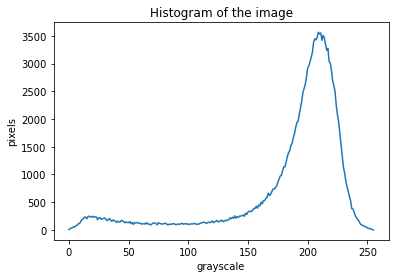

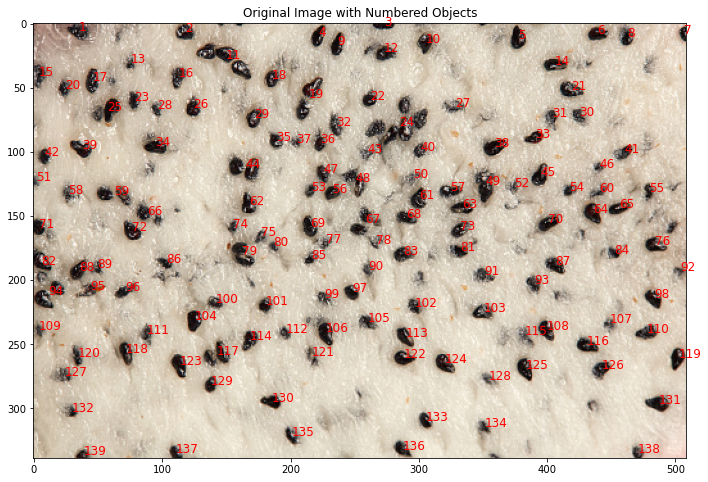

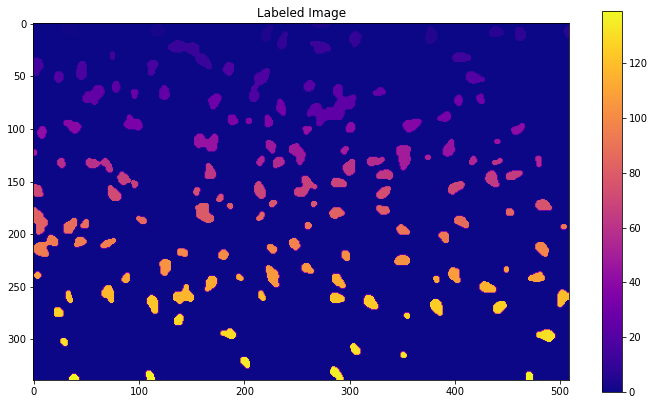

,area,bbox-0,bbox-1,bbox-2,bbox-3,convex_area,bbox_area,eccentricity
0,174,0,26,13,44,180,234,0.755887
1,139,0,111,13,125,146,182,0.394001
2,73,0,265,5,282,75,85,0.954068
3,121,2,217,18,228,129,176,0.856020
4,154,3,372,20,384,161,204,0.751619
...,...,...,...,...,...,...,...,...
134,75,317,197,328,206,76,99,0.774570
135,106,326,282,339,295,113,169,0.855519
136,65,330,107,339,116,67,81,0.687796
137,52,331,468,339,475,52,56,0.502379


In [40]:
element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])
properties = ['area','bbox','convex_area','bbox_area','eccentricity']
features('seeds.jpg', 0, 110, element, closing, opening, properties)


Since there are alot of blobs or object, I decided to check the distribution of their areas through a histogra,

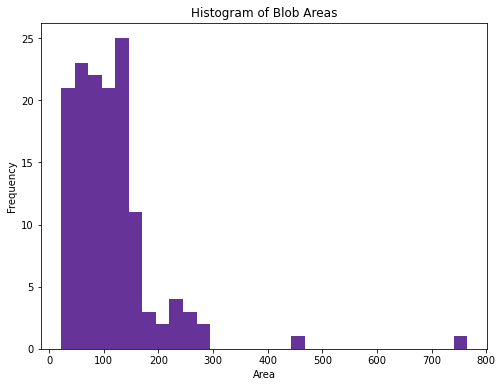

In [36]:
df = graph('seeds.jpg', 0, 110, element, closing, opening, properties)

plt.figure(figsize=(8, 6))
plt.hist(df['area'], bins=30, color='rebeccapurple')
plt.title('Histogram of Blob Areas')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()


**IRREGULARLY-SHAPED BLOBS:** Here, I used the image of rocks with different shaped but nearly same sizes.

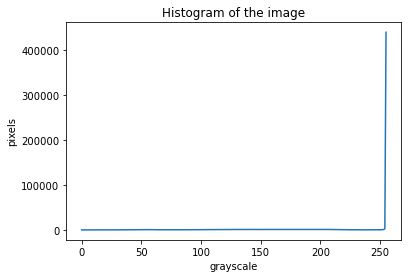

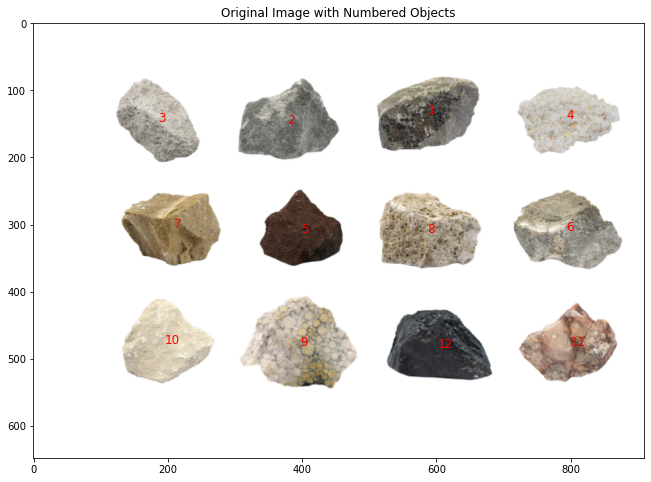

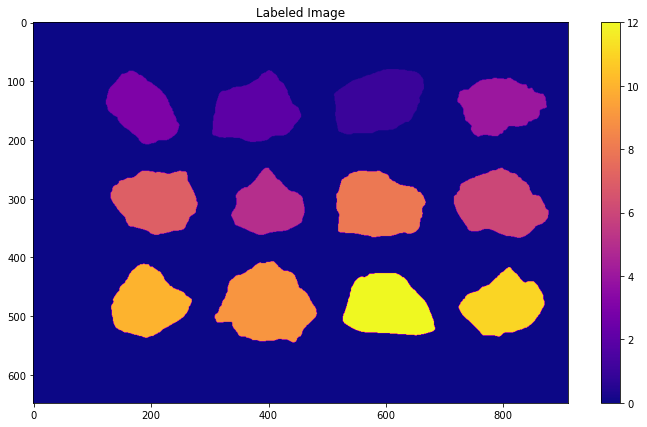

,area,convex_area,bbox_area,major_axis_length,minor_axis_length,eccentricity,perimeter
0,13058,13375,16983,164.536086,102.014672,0.784591,456.534055
1,12489,13245,18422,150.446144,109.388133,0.686540,459.060967
2,9875,10146,15625,140.555391,90.426853,0.765569,395.244733
3,10501,11214,15200,145.195815,94.650734,0.758319,434.918831
4,9327,9904,14250,120.540562,102.263759,0.529394,389.889394
5,13174,13777,19159,157.493462,108.437021,0.725220,466.759451
6,12079,12622,16132,144.793096,107.780561,0.667760,440.575685
7,13596,14204,17176,157.495732,112.614429,0.699092,472.048773
8,16077,17090,24012,159.140695,131.333989,0.564739,521.286363
9,11145,11579,17262,127.872516,115.337852,0.431788,422.658946


In [43]:
element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])
properties = ['area','convex_area','bbox_area','major_axis_length', 'minor_axis_length','eccentricity', 'perimeter']
features('rocks.png',0, 240, element, closing, opening, properties)

I also graphed their perimeters for better visualization.

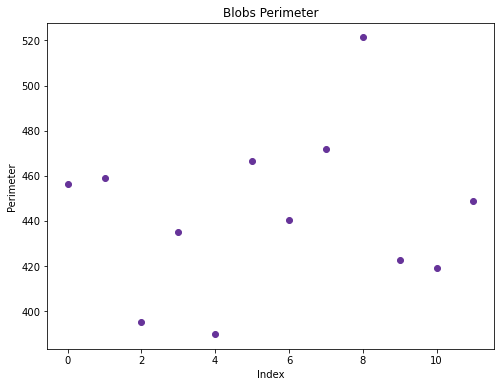

In [65]:
df = graph('rocks.png',0, 240, element, closing, opening, properties)

plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['perimeter'], color='rebeccapurple')
plt.title('Blobs Perimeter')
plt.xlabel('Index')
plt.ylabel('Perimeter')
plt.show()


**DIFFERENT-SHAPED BLOBS:** And lastly, I used an image of shells of different shapes and sizes.

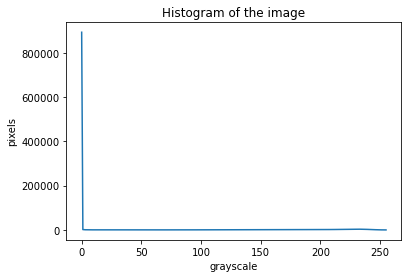

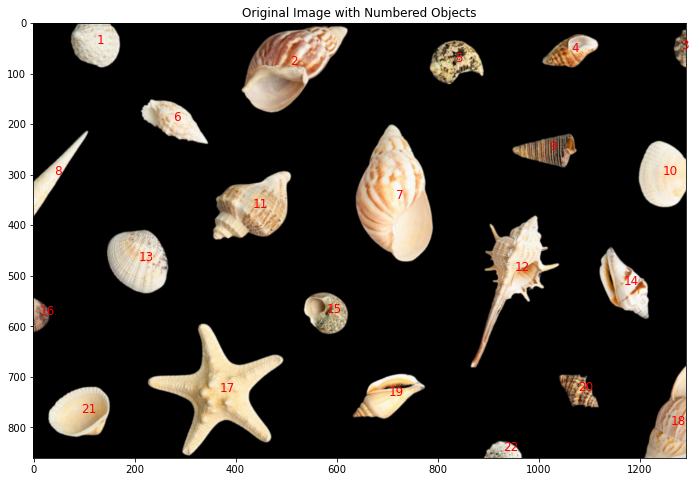

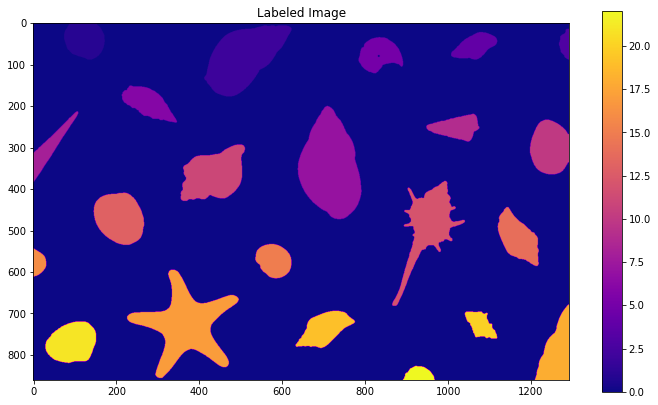

,area,bbox-0,bbox-1,bbox-2,bbox-3,convex_area,bbox_area,major_axis_length,minor_axis_length,perimeter
0,6980,0,75,88,173,7083,8624,102.045684,87.813917,317.036580
1,21501,6,413,177,623,22024,35910,232.215398,122.474732,622.825469
2,1239,14,1268,88,1292,1320,1776,70.325609,24.740962,172.083261
3,4551,22,1008,88,1119,4745,7326,110.356325,53.710705,287.563492
4,6216,34,785,121,892,7005,9309,106.442582,79.763927,351.019336
5,6456,151,214,240,347,6767,11837,139.182731,60.849627,363.504617
6,27967,200,638,473,792,28482,42042,257.893535,141.678903,699.109740
7,4446,213,0,383,109,4723,18530,186.961347,35.942050,433.327994
8,5159,219,948,286,1076,5415,8576,125.326117,57.488968,331.521861
9,10027,233,1198,365,1292,10126,12408,133.269617,96.108598,381.220346


In [44]:
element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])
properties = ['area','bbox','convex_area','bbox_area','major_axis_length', 'minor_axis_length','perimeter']
features('9.png',40, 256, element, closing, opening, properties)

Also got their perimeters graph for easier inference.

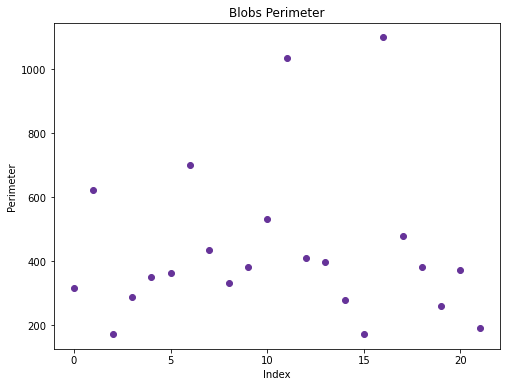

In [72]:
df = graph('9.png',40, 256, element, closing, opening, properties)

plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['perimeter'], color = 'rebeccapurple')
plt.title('Blobs Perimeter')
plt.xlabel('Index')
plt.ylabel('Perimeter')
plt.show()
